In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

Duplicate key in file PosixPath('/Users/k22120kk/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 262 ('font.family:  sans-serif')


In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../../data/肉を焼く1/"
acc = pd.read_csv(fname+"Angular.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

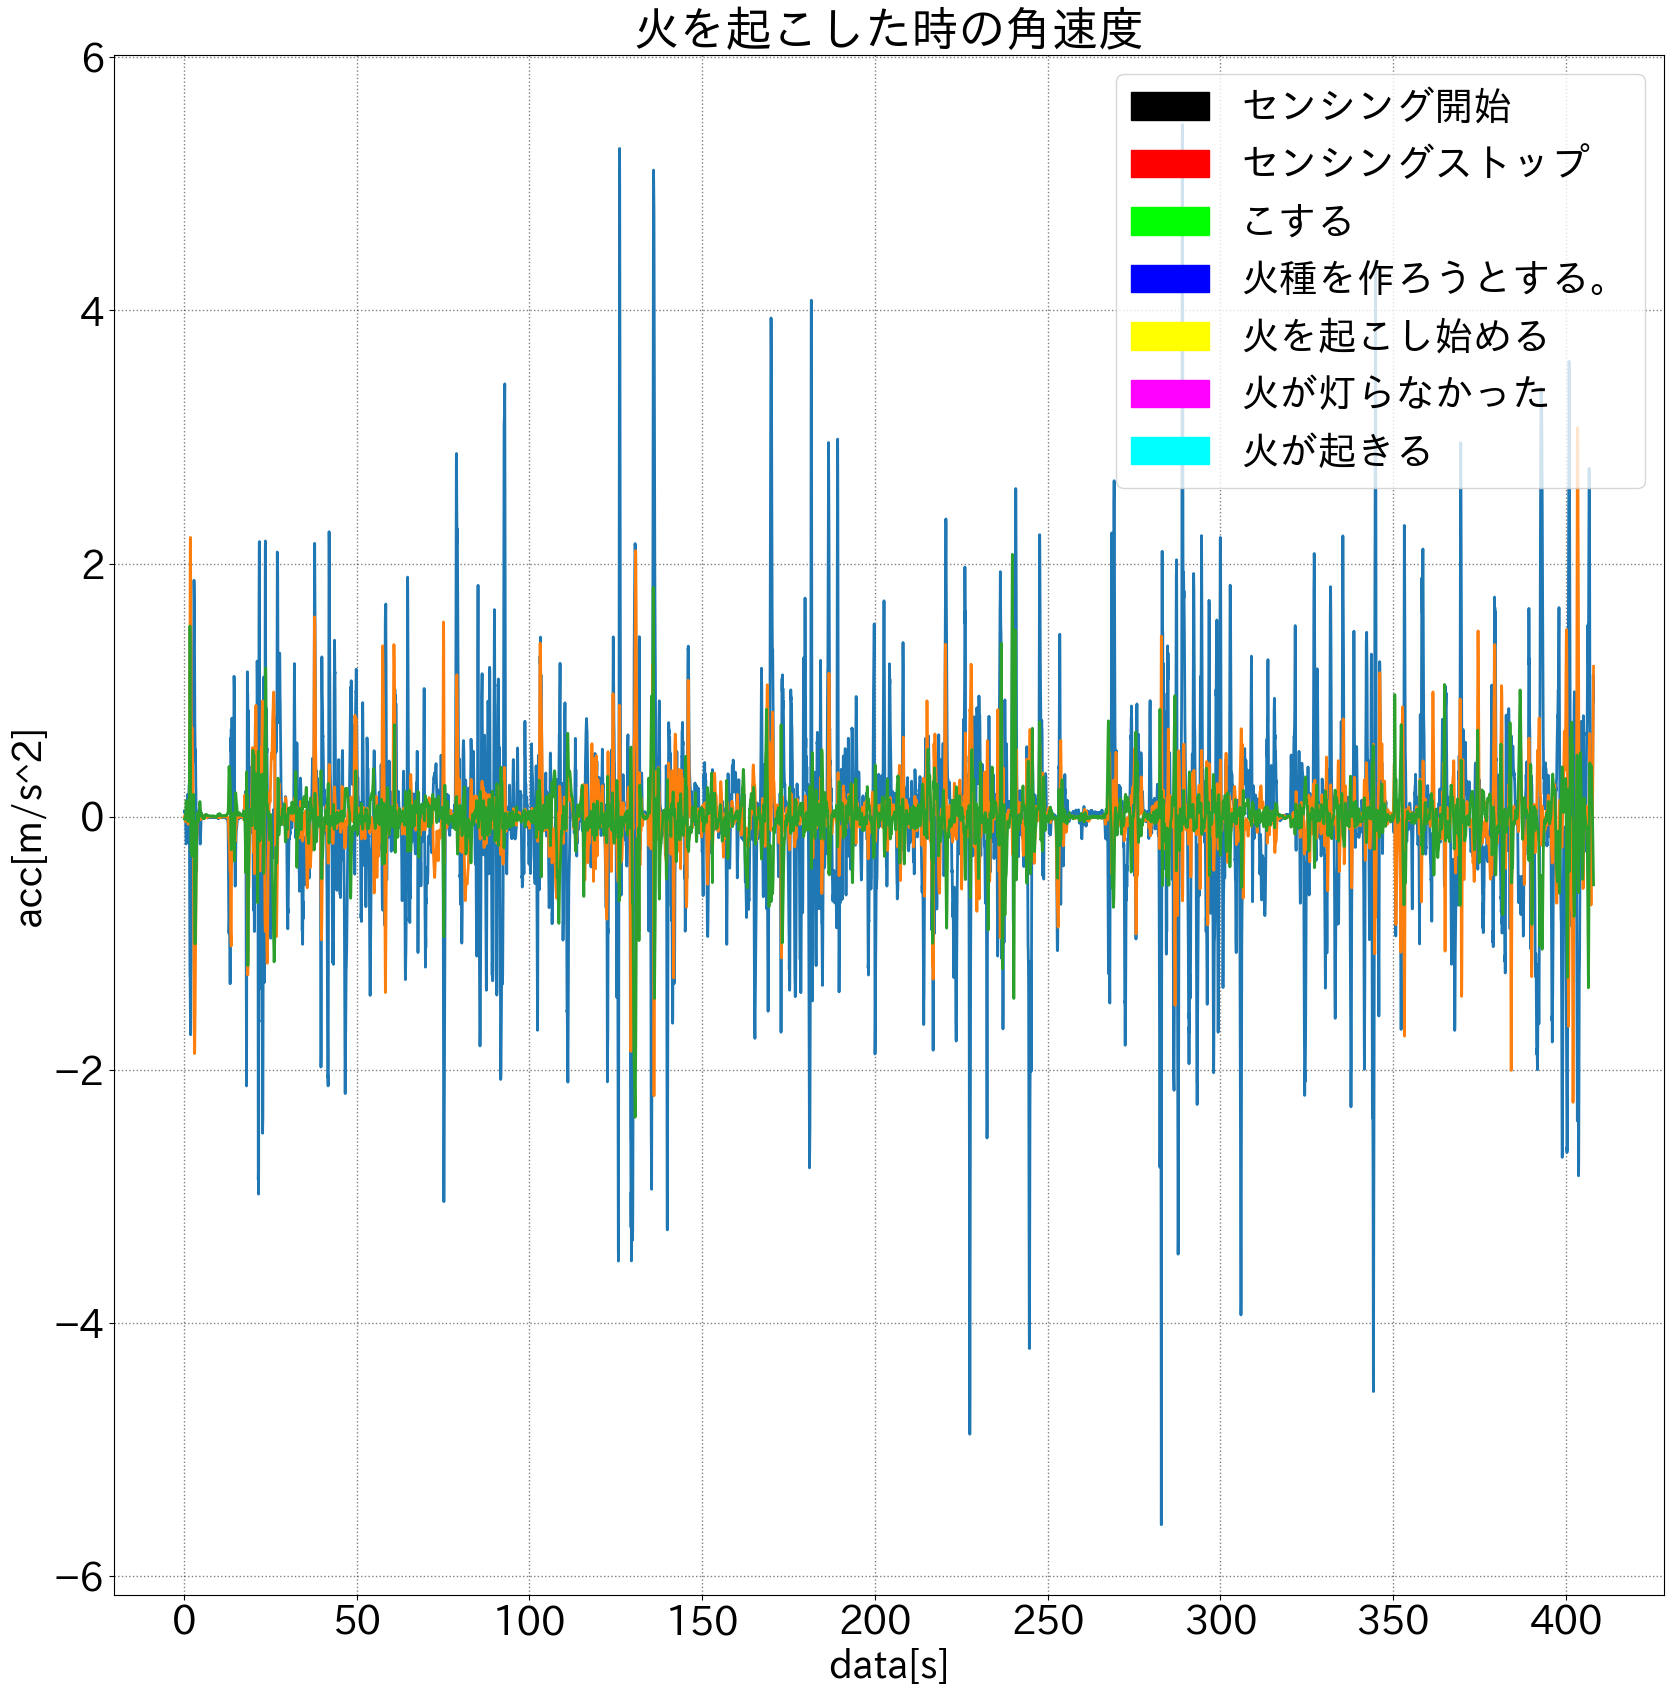

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("火を起こした時の角速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)


ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "こする": "#00ff00",
    "火種を作ろうとする。": "#0000ff",
    "火を起こし始める": "#ffff00",
    "火が灯らなかった": "#ff00ff",
    "火が起きる": "#00ffff",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000 if i < len(ans) - 1 else (acc["time"].max() - ans["time"][0]) / 1000
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()